<a href="https://colab.research.google.com/github/VarshithRoa/2303A51441/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_table("/content/sample_data/california_housing_train.csv",sep=',', index_col=0)
df.head()

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,,,,,,,,
-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


<class 'pandas.core.frame.DataFrame'>
Index: 17000 entries, -114.31 to -124.35
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            17000 non-null  float64
 1   housing_median_age  17000 non-null  float64
 2   total_rooms         17000 non-null  float64
 3   total_bedrooms      17000 non-null  float64
 4   population          17000 non-null  float64
 5   households          17000 non-null  float64
 6   median_income       17000 non-null  float64
 7   median_house_value  17000 non-null  float64
dtypes: float64(8)
memory usage: 1.2 MB


ValueError: Could not interpret value `TARGET CLASS` for `x`. An entry with this name does not appear in `data`.

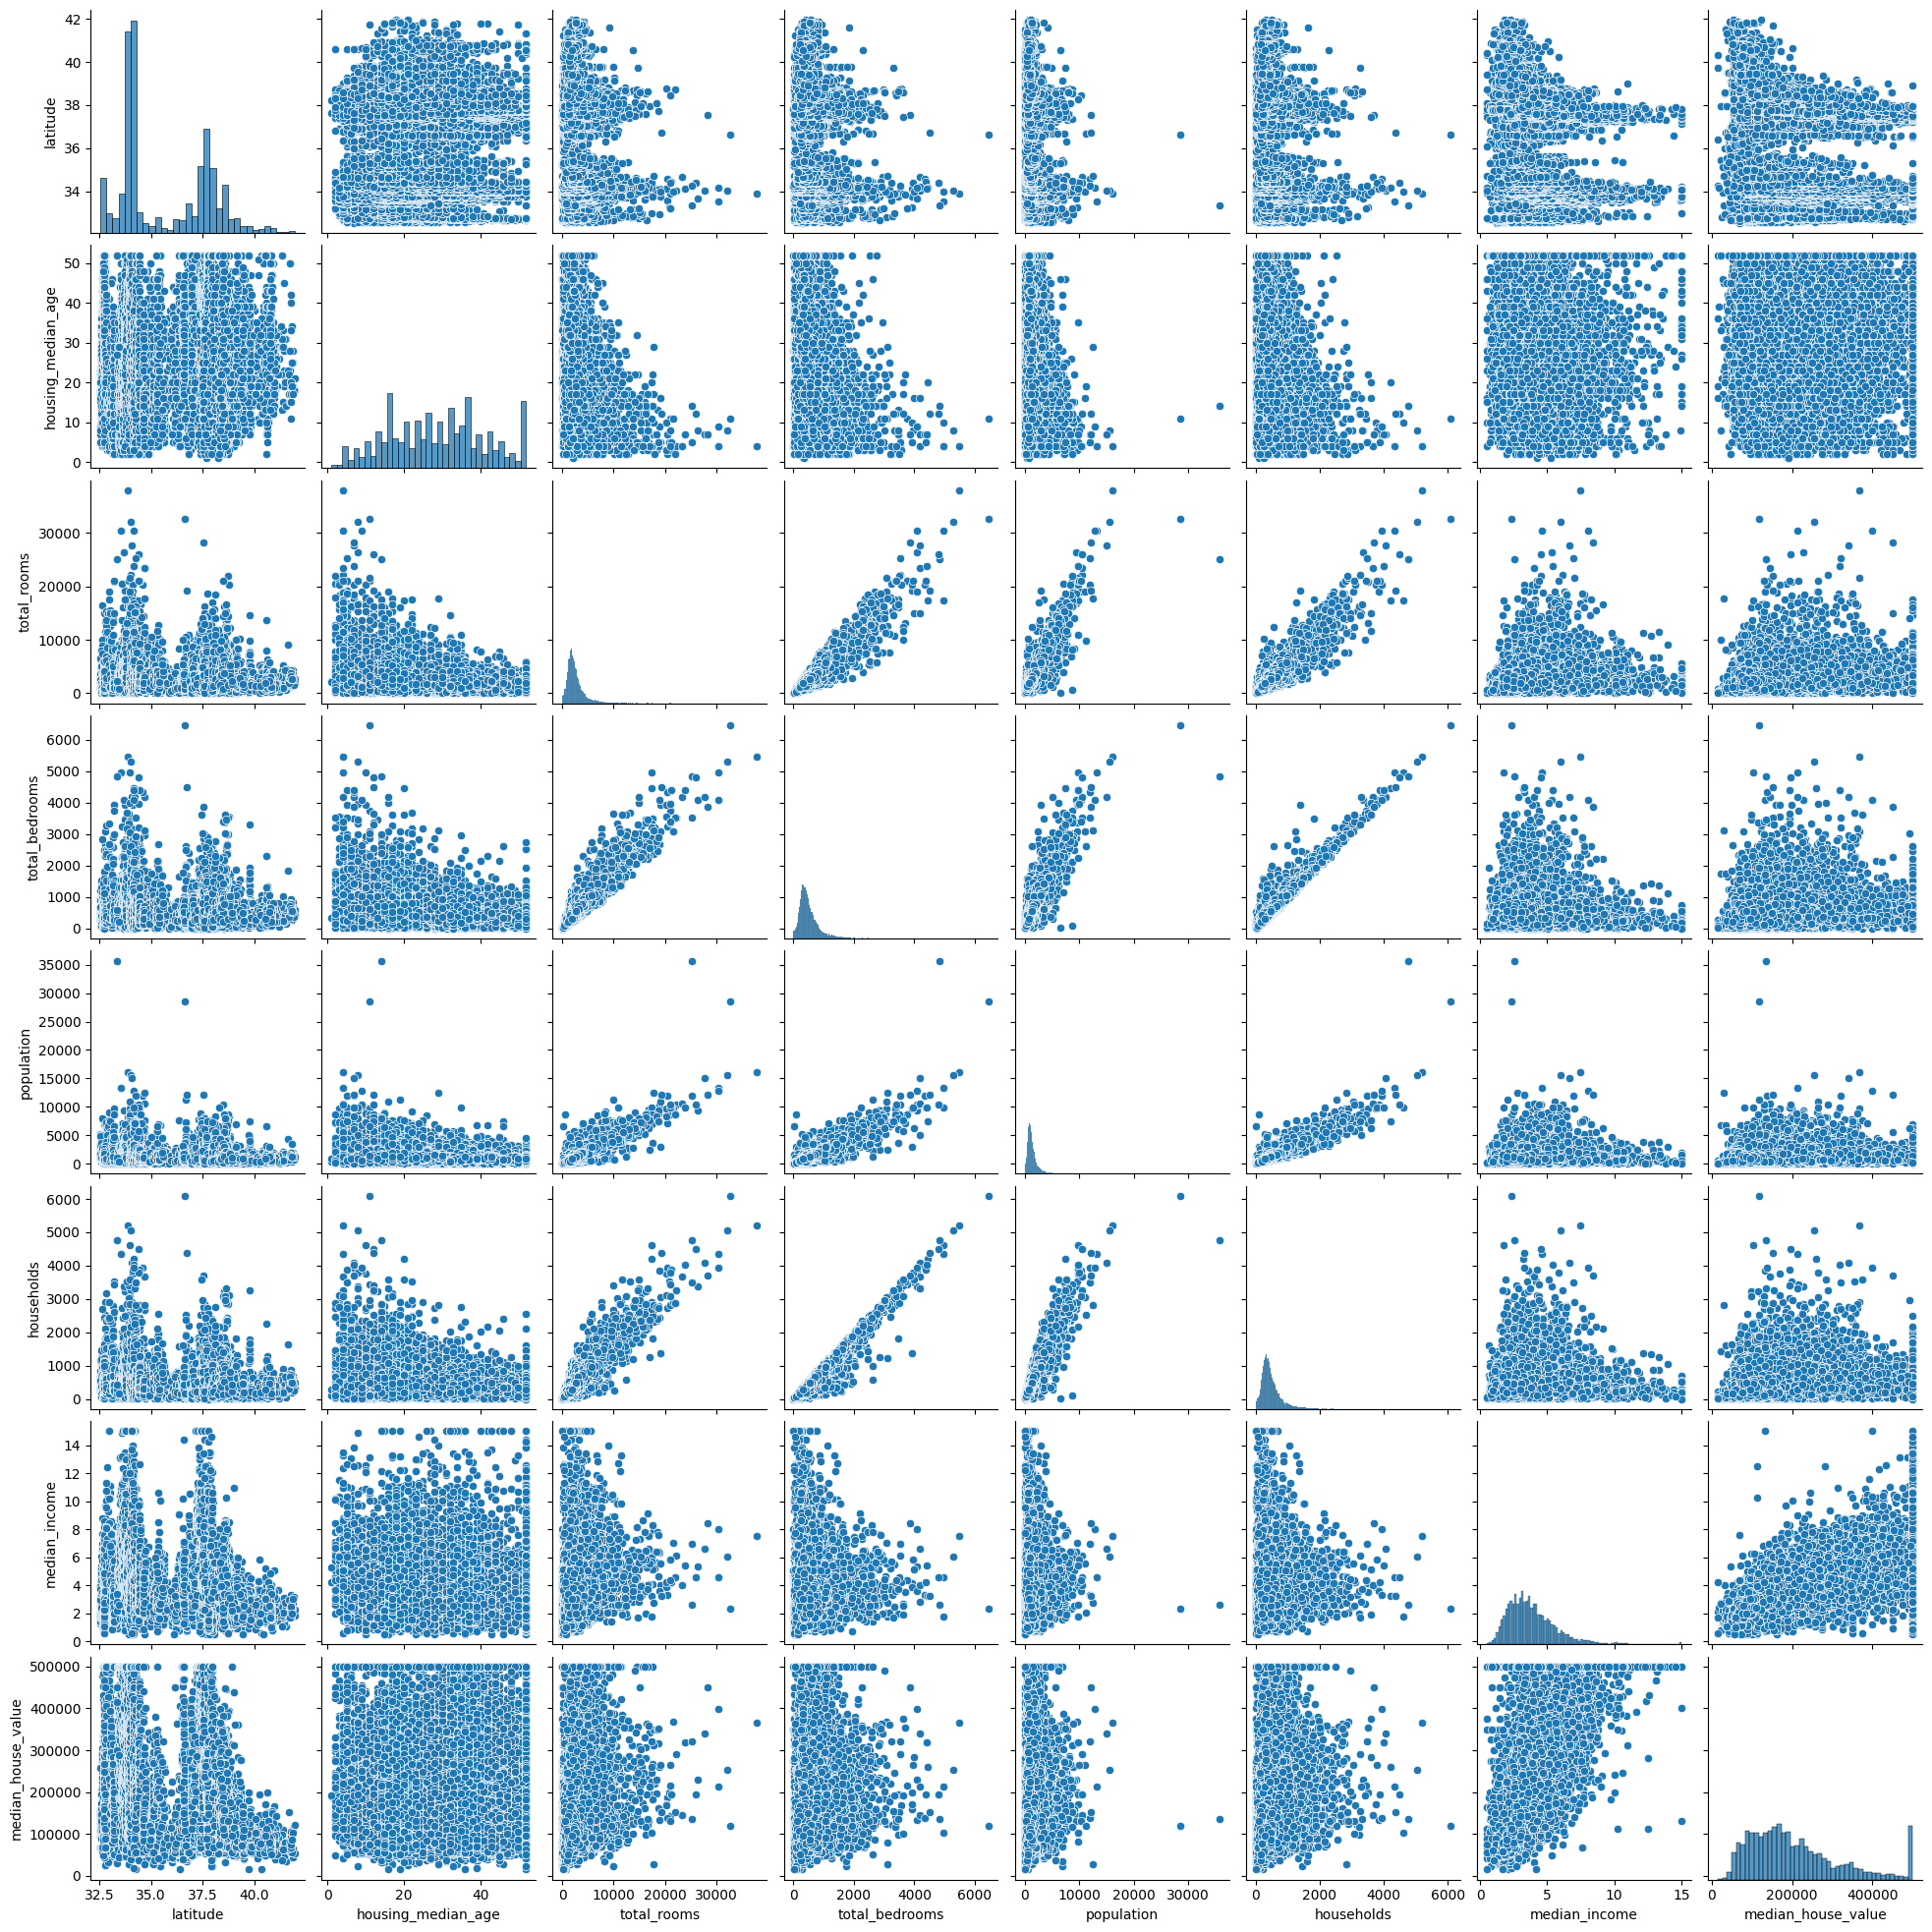

In [2]:
df.info()
df.describe()
l=list(df.columns)
l[0:len(l)-2]
sns.pairplot(df)
l=list(df.columns)
l[0:len(l)-2]

for i in range(len(l)-1):
    sns.boxplot(x='TARGET CLASS',y=l[i], data=df)
    plt.figure()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()
from sklearn.model_selection import train_test_split
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test =train_test_split(scaled_features,df['TARGET CLASS'],
                 test_size=0.30, random_state=101)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)
print(classification_report(y_test,pred))
print("Misclassification error rate:",round(np.mean(pred!=y_test),3))
error_rate = []

# Will take some time
for i in range(1,60):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue',
         linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)